# Handwritten Digits

Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

Let's load the dataset first.

In [22]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [8]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [9]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Tasks. Part 0.

1) First thing, grab a piece of paper and visually classify those 49 digits. We'll see if you're better or worse than a computer! 

**Spoiler alert: Davide's efficiency was ~80%, much worse than ML!**


2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.  


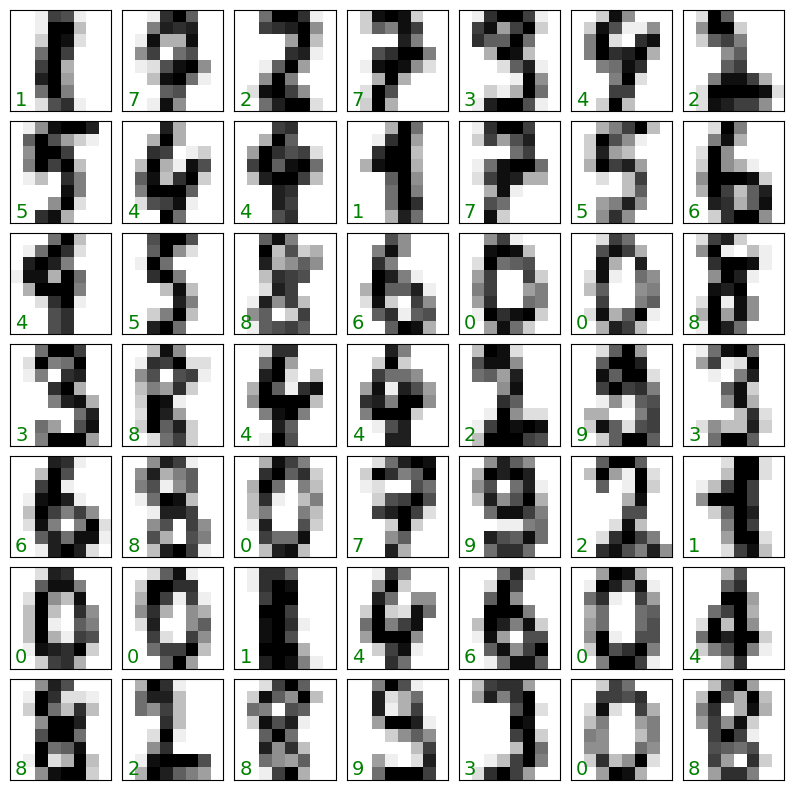

In [10]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

Ok so the data is simply each pixel value within an $8\times 8$ grid.  For this analysis, we don't care about the $2$-D nature of the image, we can just treat it as an $8\times8=64$ dimensional array. So our data have $1797$ samples in $64$ dimensions.

Then each of the $1797$ ***images*** has a label.

In [11]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).


In [15]:
X, y = datasets.load_digits(return_X_y=True)

embedding = Isomap(n_components=2)
X_transf  = embedding.fit_transform(X[:])

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7db3491dec20>
Traceback (most recent call last):
  File "/home/ario/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ario/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ario/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ario/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/home/ario/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components o

In [16]:
X.shape

(1797, 64)

In [17]:
X_transf.shape

(1797, 2)

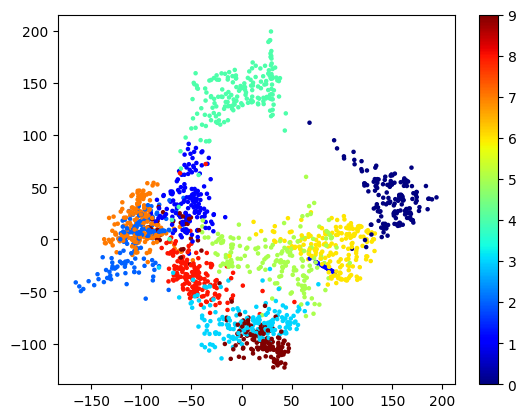

In [21]:
plt.scatter(X_transf[:, 0], X_transf[:, 1], c=y, s=5, cmap='jet')
plt.colorbar()

### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8)

In [26]:
lr = LogisticRegression(solver='sag', max_iter=100000)

In [27]:
lr.fit(Xtrain, ytrain)

LogisticRegression(max_iter=100000, solver='sag')

In [28]:
print('coeff:', lr.coef_)

coeff: [[ 0.00000000e+00 -6.49145492e-04 -9.79315994e-03  1.03559653e-01
   3.34448464e-03 -7.74457571e-02 -5.05808520e-02 -1.48066039e-02
  -2.69095647e-04 -1.99691408e-02 -2.75019332e-02  2.25662164e-02
   7.67592884e-02  1.34291778e-02 -3.10765306e-02 -9.05270006e-03
  -2.62464434e-04  3.49958248e-03  1.26971011e-01 -6.39876348e-03
  -1.19320717e-01  1.34047306e-01  1.51689810e-02 -8.12917277e-05
   0.00000000e+00  2.90329291e-02  1.35162936e-01 -1.81712553e-01
  -2.90642043e-01  7.21702856e-02  4.08178558e-02  0.00000000e+00
   0.00000000e+00  4.37285671e-02  7.67391822e-02 -1.40020832e-01
  -2.73424877e-01  4.00329584e-02  3.91064763e-02  0.00000000e+00
  -2.86342548e-05 -4.74808331e-03  1.45204947e-01 -5.61954580e-02
  -1.02778327e-01  9.86908956e-02 -2.71705107e-03  0.00000000e+00
  -2.22707738e-05 -4.99765348e-02  1.12637729e-01 -4.51247080e-02
   1.19223524e-01  7.20280835e-02 -1.30415470e-01 -1.51526612e-02
  -7.42359128e-06 -6.86840649e-03 -3.03183215e-02  8.75133915e-02
  -

In [29]:
print('intercept:', lr.intercept_)

intercept: [-0.00247142 -0.00688991  0.00636528  0.00295316  0.01633864  0.00396729
 -0.00383445  0.00604278 -0.02006871 -0.00240266]


I produce a prediction of future boits based on the X-data I have. The algorithm learns and places these new points based on what it knows from the previously given database.

In [30]:
ypred_test  = lr.predict(Xtest)
ypred_train = lr.predict(Xtrain)
ypred       = lr.predict(X) 

I run an accuracy test to see the fraction of correctly labeled poits.

In [31]:
acc_test  = accuracy_score(ytest, ypred_test)
acc_train = accuracy_score(ytrain, ypred_train)
acc       = accuracy_score(y, ypred)

In [32]:
print('test accuracy:  ', acc_test)
print('train accuracy: ', acc_train)
print('accuracy:       ', acc)

test accuracy:   0.9457579972183588
train accuracy:  1.0
accuracy:        0.9565943238731218


The test accuracy is up to 95% (it was actually the only one that really mattered in terms of the accuracy).

Let's now try to use the confusion matrix, which will help me understand **where** it's gone wrong.

In [33]:
print(confusion_matrix(ytest, ypred_test))

[[142   0   1   1   0   0   1   0   0   0]
 [  0 139   0   0   0   0   1   0   2   2]
 [  0   2 132   0   0   0   0   1   0   0]
 [  0   0   1 132   0   4   0   1   3   2]
 [  0   8   0   0 134   0   0   3   0   1]
 [  1   0   1   1   0 143   0   1   0   2]
 [  0   1   0   0   0   1 152   0   0   0]
 [  0   0   0   0   0   0   0 144   0   2]
 [  0  10   2   4   0   2   1   2 112   5]
 [  0   1   0   1   0   3   0   0   3 130]]


/tmp/ipykernel_3035/3469483740.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(ytest, ypred_test)),


Text(0, 0.5, 'true')

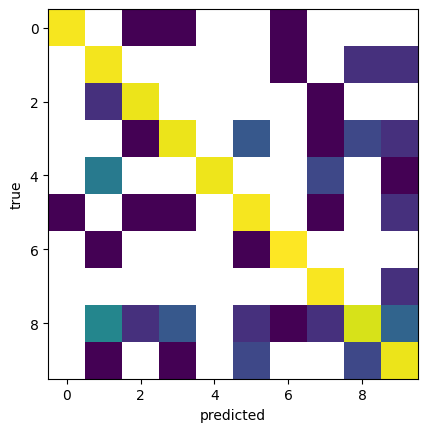

In [34]:
plt.imshow(np.log(confusion_matrix(ytest, ypred_test)),
          cmap='viridis', interpolation='nearest')
plt.xlabel('predicted')
plt.ylabel('true')

The elements outside the diagonal of the **covariance matrix** give me informations in terms of "*the number of observations known to be in row-i and predicted do be in column-j*". This means that:

- The 0 value is one of the least confused values in the whole group, as well as value 4
- The values 8 and 9 are easily confused with other (2 ore even 5).

This in a way matches the plot produced above, where the only values that are really distingishable from one another are 0 and 4. the others are much more mixed, making it difficult to label them easily.